Weighted-Graph Model:


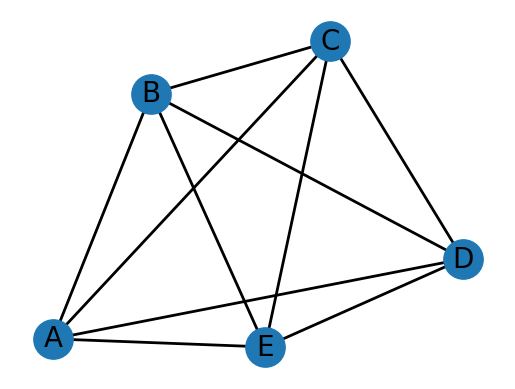

Initial Route:


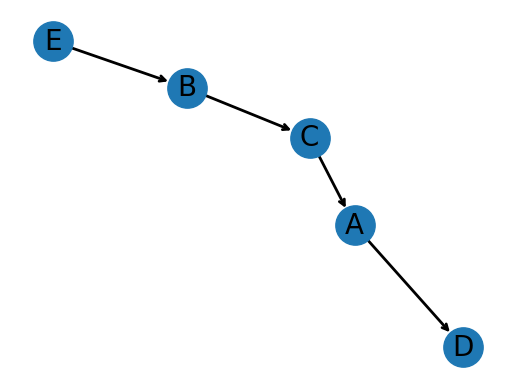

Cost : 18

------- Hill-Climbing -------
Initial Route :  ['E', 'B', 'C', 'A', 'D'] Cost:  18
Iteration:  1
Path ['B', 'E', 'C', 'A', 'D'] Cost:  21
Path ['C', 'B', 'E', 'A', 'D'] Cost:  25
Path ['A', 'B', 'C', 'E', 'D'] Cost:  34
Path ['D', 'B', 'C', 'A', 'E'] Cost:  28
Path ['E', 'C', 'B', 'A', 'D'] Cost:  30
Path ['E', 'A', 'C', 'B', 'D'] Cost:  28
Path ['E', 'D', 'C', 'A', 'B'] Cost:  22
Path ['E', 'B', 'A', 'C', 'D'] Cost:  21
Path ['E', 'B', 'D', 'A', 'C'] Cost:  17
New Initial Route:  ['E', 'B', 'D', 'A', 'C'] Cost:  17
Path ['E', 'B', 'C', 'D', 'A'] Cost:  19

Initial Route :  ['E', 'B', 'D', 'A', 'C'] Cost:  17
Iteration:  2
Path ['B', 'E', 'D', 'A', 'C'] Cost:  16
New Initial Route:  ['B', 'E', 'D', 'A', 'C'] Cost:  16
Path ['D', 'B', 'E', 'A', 'C'] Cost:  25
Path ['A', 'B', 'D', 'E', 'C'] Cost:  33
Path ['C', 'B', 'D', 'A', 'E'] Cost:  27
Path ['E', 'D', 'B', 'A', 'C'] Cost:  25
Path ['E', 'A', 'D', 'B', 'C'] Cost:  27
Path ['E', 'C', 'D', 'A', 'B'] Cost:  26
Path ['E', 'B',

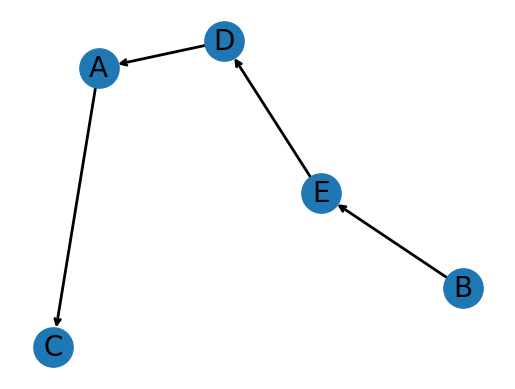

Cost:  16


In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Weighted Graph Model
print('Weighted-Graph Model:')
G = nx.Graph()

G.add_edge('A', 'B', weight=9)
G.add_edge('A', 'C', weight=3)
G.add_edge('A', 'D', weight=2)
G.add_edge('A', 'E', weight=10)
G.add_edge('B', 'C', weight=8)
G.add_edge('B', 'D', weight=7)
G.add_edge('B', 'E', weight=5)
G.add_edge('C', 'D', weight=4)
G.add_edge('C', 'E', weight=11)
G.add_edge('D', 'E', weight=6)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=800)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

# Initial Route
print('Initial Route:')
I = nx.DiGraph()

I.add_edges_from([('E', 'B'), ('B', 'C'), ('C', 'A'), ('A', 'D')])

pos = nx.spring_layout(I)

nx.draw_networkx_nodes(I, pos, node_size=800)
nx.draw_networkx_edges(I, pos, node_size=800, arrowstyle='->', arrowsize=10, width=2)
nx.draw_networkx_labels(I, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()
print('Cost : 18')
print()

# Hill Climbing
print("------- Hill-Climbing -------")
cost = [
    [0, 9, 3, 2, 10],
    [9, 0, 8, 7, 5],
    [3, 8, 0, 4, 11],
    [2, 7, 4, 0, 6],
    [10, 5, 11, 6, 0]
]
init = ['E', 'B', 'C', 'A', 'D']
new_init = init.copy()
base = 18
i = 0
count = 0
loop = 1
itr = 1
while loop:
    loop = 0
    temp = new_init.copy()
    print("Initial Route : ", new_init, "Cost: ", base)
    print("Iteration: ", itr)

    while i < 5:
        for j in range(i, 5):
            if i == j:
                continue
            tempPath = new_init[i]
            new_init[i] = new_init[j]
            new_init[j] = tempPath

            for x in range(0, 4):
                count = count + cost[ord(new_init[x]) - 65][ord(new_init[x + 1]) - 65]
                # print(count)

            print("Path", new_init, "Cost: ", count)

            if count < base:
                init = new_init.copy()
                base = count
                print("New Initial Route: ", new_init, "Cost: ", base)
                loop = 1

            count = 0
            new_init = temp.copy()

        i += 1

    print()
    new_init = init.copy()
    itr += 1
    i = 0

# Final Route
print("Final Route: ")
T = nx.DiGraph()
T.add_edges_from([(init[0], init[1]), (init[1], init[2]), (init[2], init[3]), (init[3], init[4])])

posnew = nx.spring_layout(T)

nx.draw_networkx_nodes(T, posnew, node_size=800)
nx.draw_networkx_edges(T, posnew, node_size=800, arrowstyle='->', arrowsize=10, width=2)
nx.draw_networkx_labels(T, posnew, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()
print("Cost: ", base)